In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


`geweke_test.py` was run with the following config:

True parameters: $\gamma=0, \rho=\sigma=1$

Trees evolved according to Stadler full likelihood for time $t=2$

Priors:
$\lambda \sim Gamma(shape=2, rate=3)$
$\mu \sim Gamma(shape=3.5, rate=3)$

Proposals:
$\lambda \sim LogNormal(_, sd=0.2)$
$\mu \sim LogNormal(_, sd=0.2)$

In [2]:
samples <- read_csv("geweke_samples.csv") |>
    select(-`...1`) |>
    pivot_longer(c(birth_response, death_response),
        names_to = "Parameter",
        values_to = "Sample"
    )


New names:
• `` -> `...1`
Rows: 4001 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Method
dbl (4): ...1, birth_response, death_response, t

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


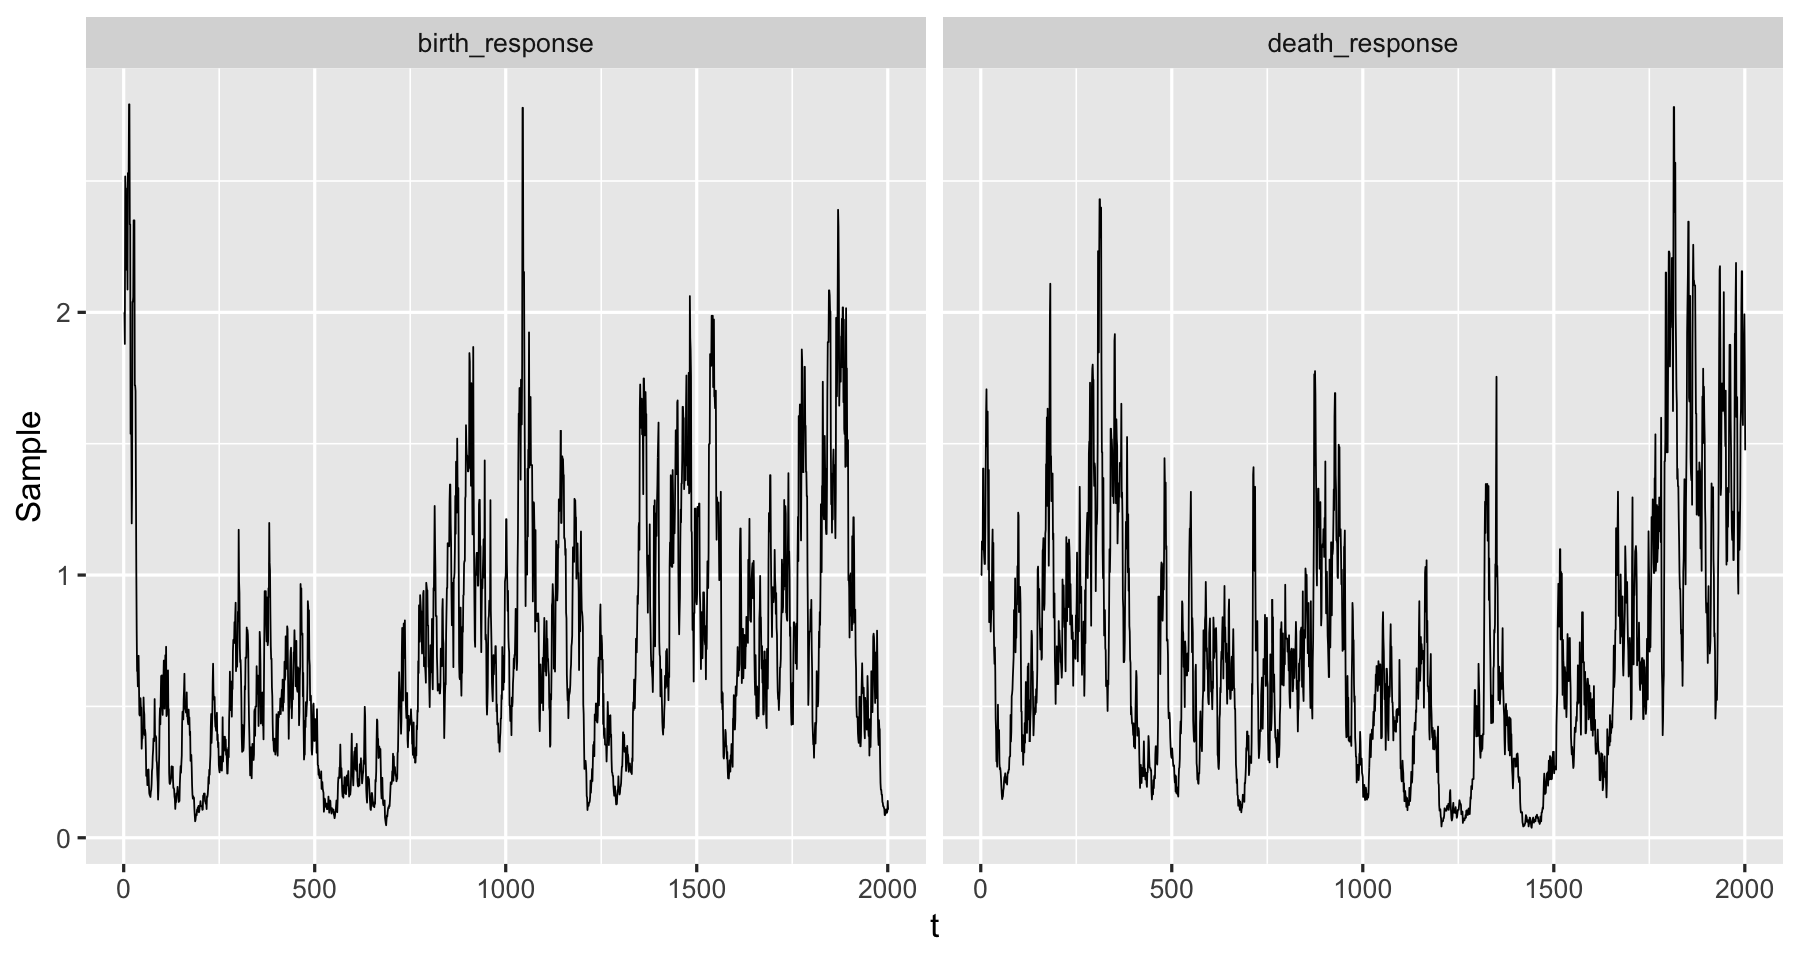

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)

samples |>
    filter(Method == "MCMC") |>
    ggplot(aes(t, Sample)) +
    geom_line() +
    facet_wrap(vars(Parameter)) +
    theme_gray(base_size = 20)


In [6]:
samples |>
    group_by(Parameter, Method) |>
    arrange(t) |>
    summarise(ESS = coda::effectiveSize(Sample))


`summarise()` has grouped output by 'Parameter'. You can override using the
`.groups` argument.


Parameter,Method,ESS
<chr>,<chr>,<dbl>
birth_response,MC,2000.00000
birth_response,MCMC,39.40159
death_response,MC,2000.00000
death_response,MCMC,25.44402


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


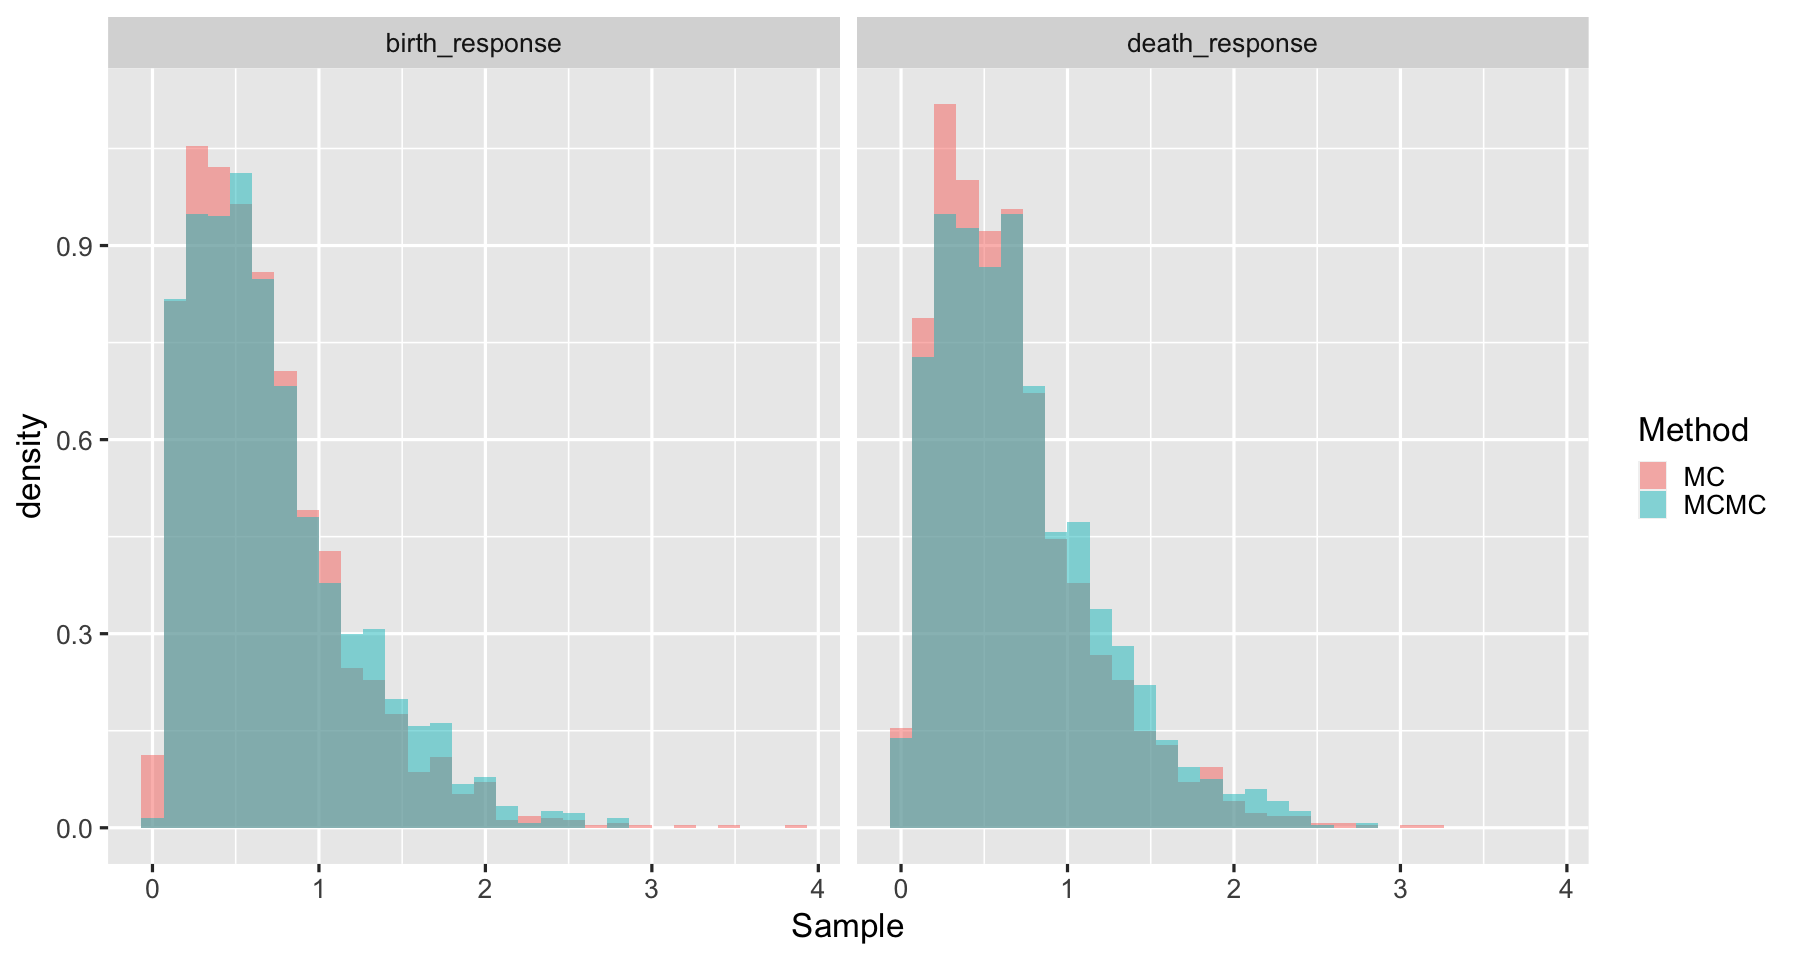

In [25]:
samples |>
    ggplot(aes(Sample, after_stat(density), fill = Method)) +
    geom_histogram(alpha = 0.5, position = "identity") +
    # geom_density(alpha = 0.5) +
    facet_wrap(vars(Parameter)) +
    theme_gray(base_size = 20)
